In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p /content/data

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/CoffeBean.zip" /content/data/

In [ ]:
!unzip -o /content/data/CoffeBean.zip -d /content/data/

Archive:  /content/data/CoffeBean.zip
  inflating: /content/data/Coffee Bean.csv  
  inflating: /content/data/test/Dark/dark (1).png  
  inflating: /content/data/test/Dark/dark (10).png  
  inflating: /content/data/test/Dark/dark (100).png  
  inflating: /content/data/test/Dark/dark (11).png  
  inflating: /content/data/test/Dark/dark (12).png  
  inflating: /content/data/test/Dark/dark (13).png  
  inflating: /content/data/test/Dark/dark (14).png  
  inflating: /content/data/test/Dark/dark (15).png  
  inflating: /content/data/test/Dark/dark (16).png  
  inflating: /content/data/test/Dark/dark (17).png  
  inflating: /content/data/test/Dark/dark (18).png  
  inflating: /content/data/test/Dark/dark (19).png  
  inflating: /content/data/test/Dark/dark (2).png  
  inflating: /content/data/test/Dark/dark (20).png  
  inflating: /content/data/test/Dark/dark (21).png  
  inflating: /content/data/test/Dark/dark (22).png  
  inflating: /content/data/test/Dark/dark (23).png  
  inflating: /con

In [ ]:
train_dir = "/content/data/train"
test_dir  = "/content/data/test"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())
print(class_names)

Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
['Dark', 'Green', 'Light', 'Medium']


In [ ]:
model = Sequential([

    Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Dropout(0.5),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),

    Dense(4, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 608ms/step - accuracy: 0.2617 - loss: 2.2458 - val_accuracy: 0.3375 - val_loss: 1.3768
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 531ms/step - accuracy: 0.3693 - loss: 1.3223 - val_accuracy: 0.2792 - val_loss: 1.3674
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 507ms/step - accuracy: 0.3533 - loss: 1.2839 - val_accuracy: 0.3750 - val_loss: 1.3427
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 508ms/step - accuracy: 0.4512 - loss: 1.1970 - val_accuracy: 0.4625 - val_loss: 1.3080
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 506ms/step - accuracy: 0.4488 - loss: 1.1144 - val_accuracy: 0.3417 - val_loss: 1.2749
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 513ms/step - accuracy: 0.4879 - loss: 1.0156 - val_accuracy: 0.3542 - val_loss: 1.2492
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 543ms/step - accuracy: 0.5141 - loss: 0.9667 - val_accuracy: 0.4250 - val_loss: 1.1700
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 522ms/step - accuracy: 0.5620 - loss: 0.8919 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9172 - loss: 0.3453
Test Accuracy: 0.8949999809265137


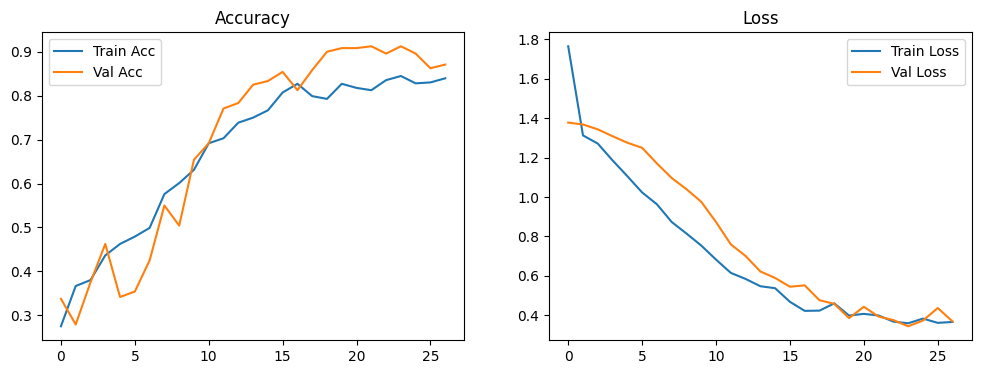

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


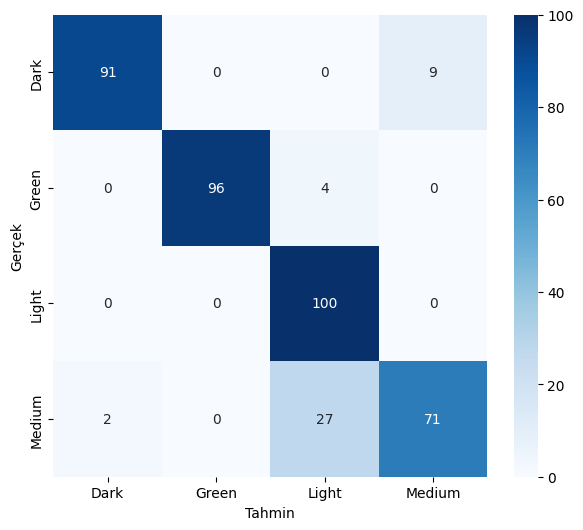

              precision    recall  f1-score   support

        Dark       0.98      0.91      0.94       100
       Green       1.00      0.96      0.98       100
       Light       0.76      1.00      0.87       100
      Medium       0.89      0.71      0.79       100

    accuracy                           0.90       400
   macro avg       0.91      0.90      0.89       400
weighted avg       0.91      0.90      0.89       400



In [ ]:
y_pred = model.predict(test_generator)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_cls)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

print(classification_report(y_true, y_pred_cls, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


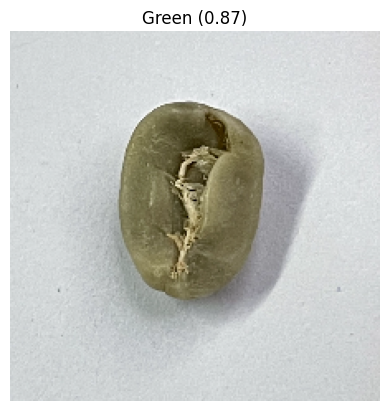

In [ ]:
test_class = random.choice(os.listdir(test_dir))
img_name = random.choice(os.listdir(os.path.join(test_dir, test_class)))
img_path = os.path.join(test_dir, test_class, img_name)

img = image.load_img(img_path, target_size=(224,224))
arr = image.img_to_array(img)
arr = np.expand_dims(arr, axis=0) / 255.0

pred = model.predict(arr)
cls = class_names[np.argmax(pred)]
conf = np.max(pred)

plt.imshow(img)
plt.title(f"{cls} ({conf:.2f})")
plt.axis('off')
plt.show()

In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model_tl = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(4, activation="softmax")
])

In [ ]:
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

In [ ]:
history_tl = model_tl.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3180 - loss: 1.5690 - val_accuracy: 0.8167 - val_loss: 0.8008
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 501ms/step - accuracy: 0.6688 - loss: 0.8736 - val_accuracy: 0.8750 - val_loss: 0.5829
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 502ms/step - accuracy: 0.8116 - loss: 0.5856 - val_accuracy: 0.9000 - val_loss: 0.4356
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 501ms/step - accuracy: 0.8110 - loss: 0.5355 - val_accuracy: 0.8958 - val_loss: 0.3667
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 503ms/step - accuracy: 0.8622 - loss: 0.4044 - val_accuracy: 0.9083 - val_loss: 0.3112
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 556ms/step - accuracy: 0.8963 - loss: 0.3319 - val_accuracy: 0.9208 - val_loss: 0.2910
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 511ms/step - accuracy: 0.9120 - loss: 0.2798 - val_accuracy: 0.9333 - val_loss: 0.2335
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 508ms/step - accuracy: 0.9040 - loss: 0.2719 - val_accurac

In [ ]:
test_loss_tl, test_acc_tl = model_tl.evaluate(test_generator)
print("Transfer Learning Test Accuracy:", test_acc_tl)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9915 - loss: 0.0464
Transfer Learning Test Accuracy: 0.9850000143051147


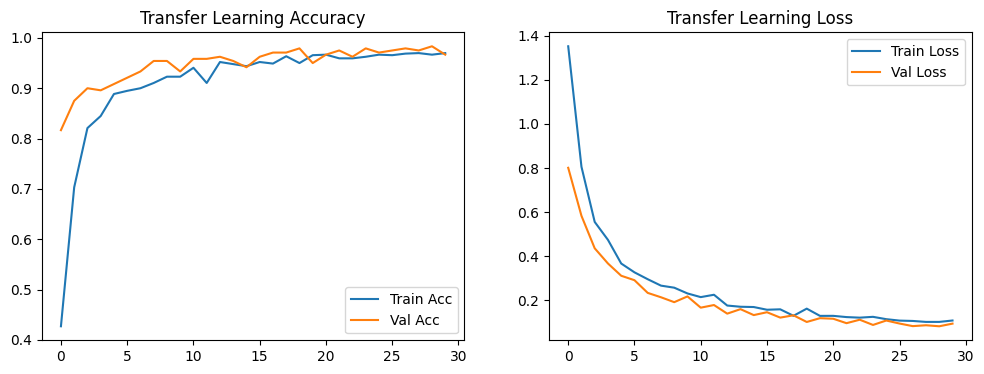

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_tl.history["accuracy"], label="Train Acc")
plt.plot(history_tl.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Transfer Learning Accuracy")

plt.subplot(1,2,2)
plt.plot(history_tl.history["loss"], label="Train Loss")
plt.plot(history_tl.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Transfer Learning Loss")

plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 436ms/step


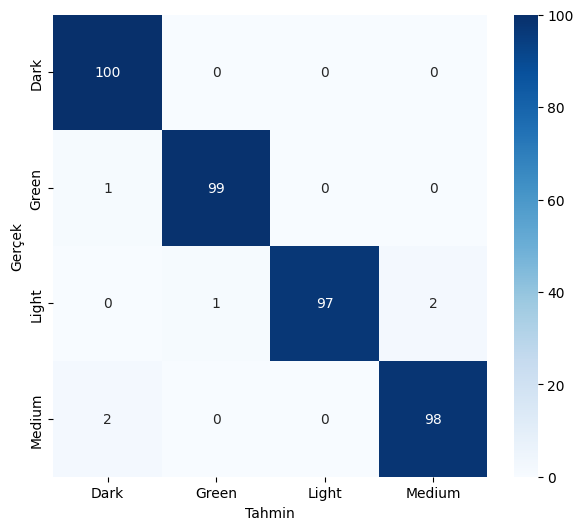

              precision    recall  f1-score   support

        Dark       0.97      1.00      0.99       100
       Green       0.99      0.99      0.99       100
       Light       1.00      0.97      0.98       100
      Medium       0.98      0.98      0.98       100

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



In [ ]:
y_pred = model_tl.predict(test_generator)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_cls)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

print(classification_report(y_true, y_pred_cls, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


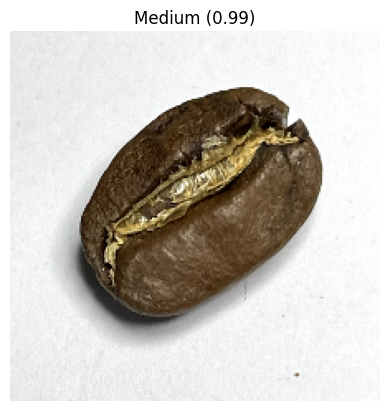

In [ ]:
test_class = random.choice(os.listdir(test_dir))
img_name = random.choice(os.listdir(os.path.join(test_dir, test_class)))
img_path = os.path.join(test_dir, test_class, img_name)

img = image.load_img(img_path, target_size=(224,224))
arr = image.img_to_array(img)
arr = np.expand_dims(arr, axis=0) / 255.0

pred = model_tl.predict(arr)
cls = class_names[np.argmax(pred)]
conf = np.max(pred)

plt.imshow(img)
plt.title(f"{cls} ({conf:.2f})")
plt.axis('off')
plt.show()